<a href="https://colab.research.google.com/github/N335HMAVA5UD3V/Cognorise-infotech/blob/main/employee_salaries_Cognorise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1> <center> **EMPLOYEE SALARY FOR DIFFERENT JOB ROLES** <center>

#**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#**About the Dataset**

The dataset contains a rich collection of attributes related to employee salaries and job characteristics:

work_year: The year of employment, providing a temporal context for salary analysis and trends.

experience_level: The experience level of employees, categorized as entry-level, mid-level, or senior. This field allows you to investigate the relationship between experience and compensation.

employment_type: The type of employment, including full-time, part-time, and contract. Exploring this field helps discern differences in pay based on employment arrangements.

job_title: The job title or position held by each employee. This attribute enables you to compare salaries across various roles and identify high-demand positions.

salary: The actual salary amount denominated in the local currency, forming the core of the dataset for compensation analysis.

salary_currency: The currency in which salaries are denoted, facilitating cross-border comparisons while considering exchange rates.

salary_in_usd: The equivalent salary amount in USD (United States Dollars). This conversion factor enables global salary comparisons and standardizes the currency for international analyses.

employee_residence: The geographic location of the employee's residence, allowing for regional salary insights.

remote_ratio: The percentage of remote work allowed for each job role, enabling exploration of the impact of remote work on compensation.

company_location: The geographic location of the company, facilitating analyses of regional salary variations and economic disparities.

company_size: The size of the company, categorized as small, medium, or large, providing insights into the correlation between company size and employee compensation.

work_year
experience_level
employment_type
job_title
salary
salary_currency
salary_in_usd
employee_residence
remote_ratio


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CognoRise/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# **Data cleaning**

In [ ]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [ ]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


#**EDA**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

highest number of workers are in the year 2022

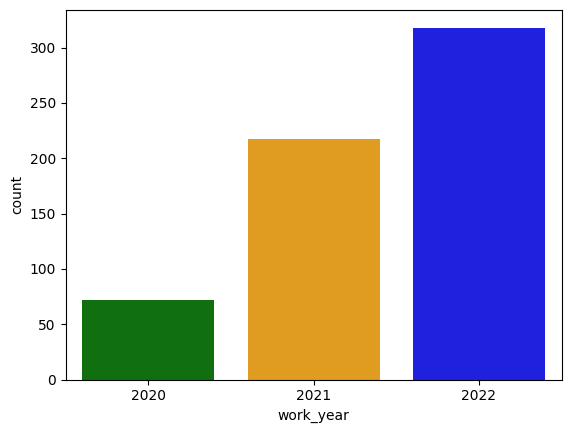

In [ ]:
color_dict = {'2020':'green','2021':'orange','2022':'blue'}
sns.countplot(data=df, x='work_year',palette=color_dict)
plt.show()

most of the workers have an experience of senior level

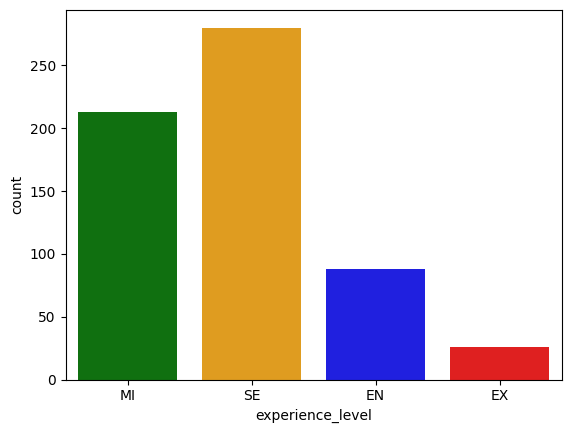

In [ ]:
color_dict = {'MI':'green','SE':'orange','EN':'blue','EX':'red'}
sns.countplot(data=df, x='experience_level',palette=color_dict)
plt.show()

most of the workers are full time

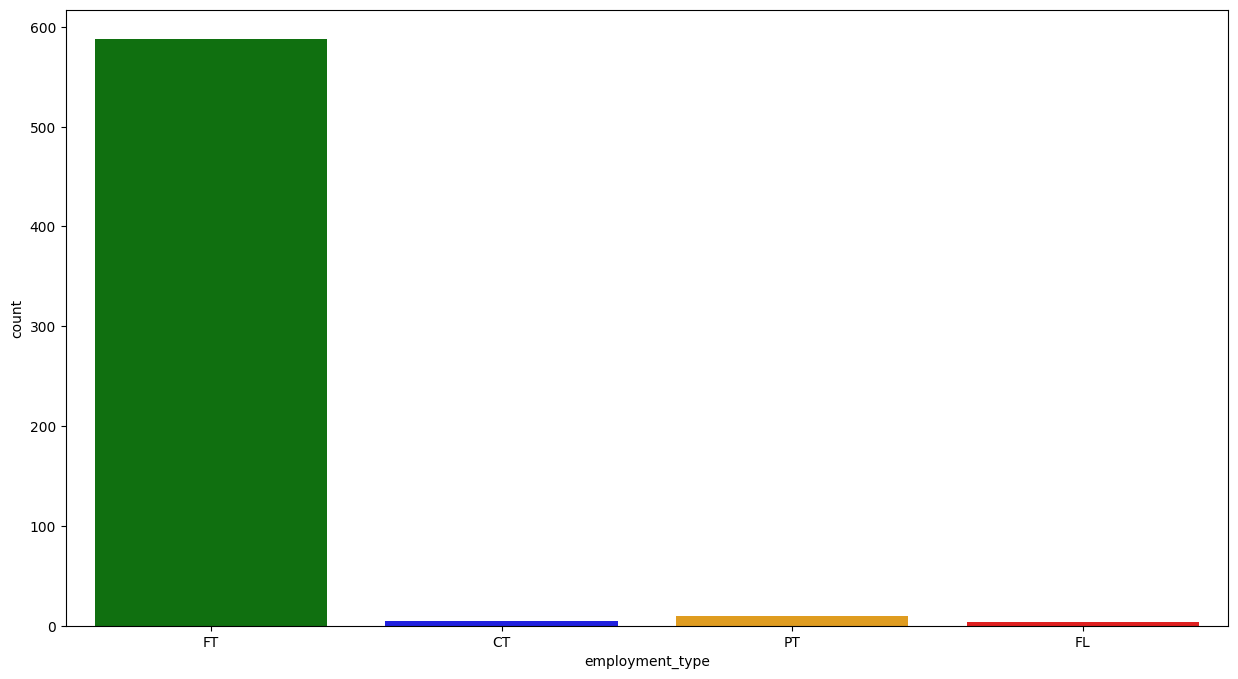

In [ ]:
color_dict = {'FT':'green','PT':'orange','CT':'blue','FL':'red'}
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='employment_type',palette=color_dict)
plt.show()

In [ ]:
df.salary_currency.value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

most of the employees eran in USD

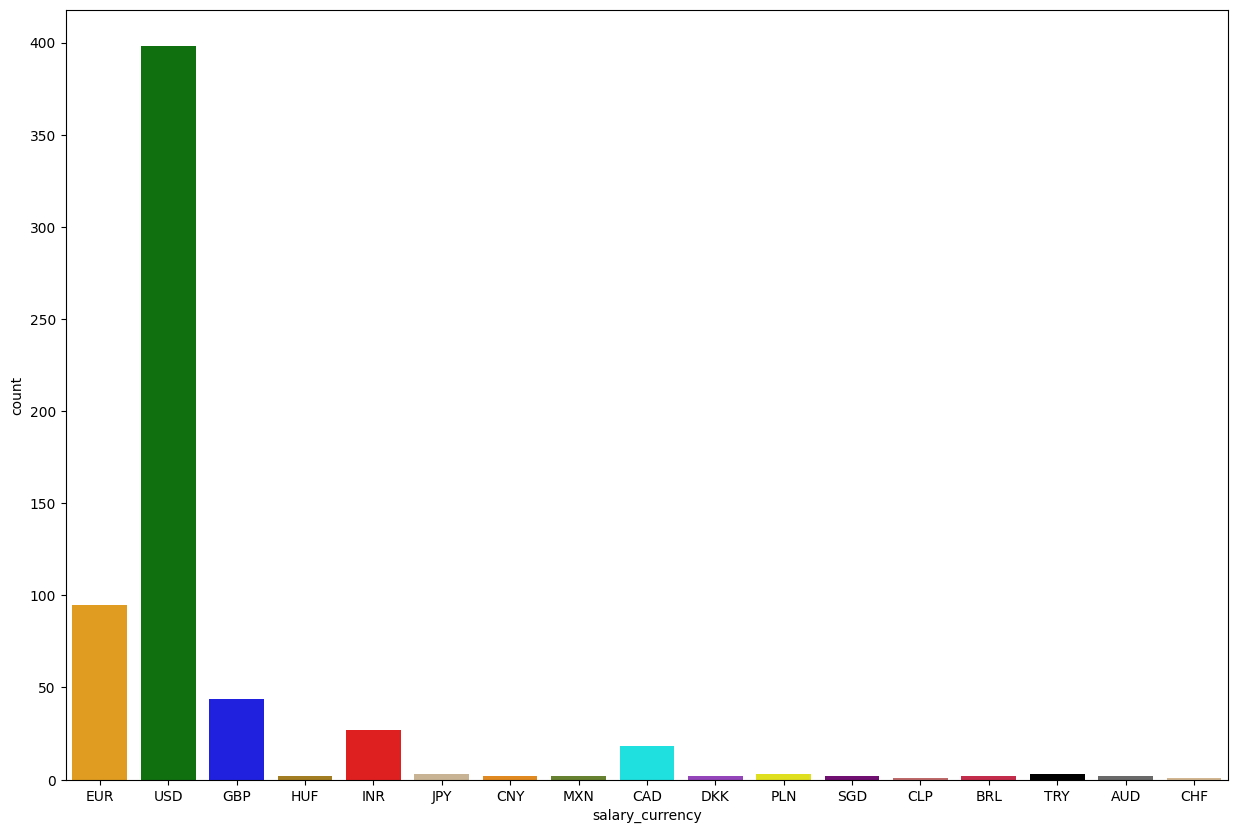

In [ ]:
color_dict = {'USD':'green','EUR':'orange','GBP':'blue','INR':'red','CAD':'cyan','JPY':'tan','PLN':'yellow','TRY':'black','CNY':'darkorange',
              'MXN':'olivedrab','HUF':'darkgoldenrod','DKK':'darkorchid','SGD':'purple','BRL':'crimson','AUD':'dimgray','CLP':'indianred','CHF':'burlywood'}
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='salary_currency',palette=color_dict)
plt.show()

most of the employees works on medius size company

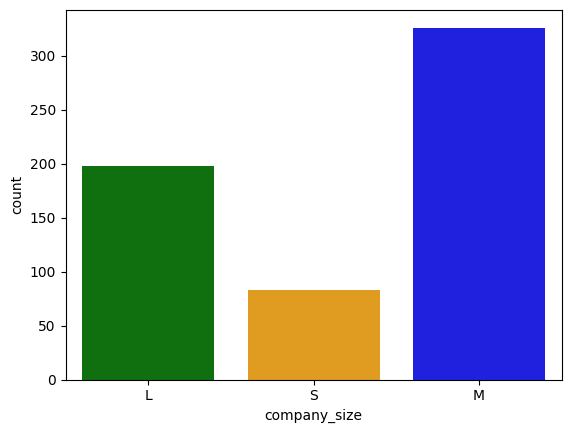

In [ ]:
color_dict = {'L':'green','S':'orange','M':'blue'}
sns.countplot(data=df, x='company_size',palette=color_dict)
plt.show()

Employee who worked in 2021 has the highest salary

Text(0.5, 1.0, 'work year vs salary in usd')

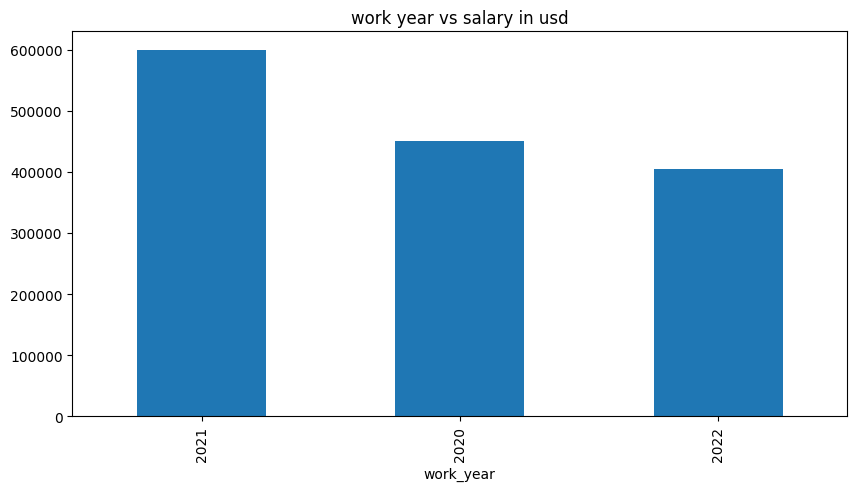

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('work_year')['salary_in_usd'].max().sort_values(ascending=False).plot.bar()
plt.title('work year vs salary in usd')

executive level members have the highest salary

Text(0.5, 1.0, 'experience level vs salary in USD')

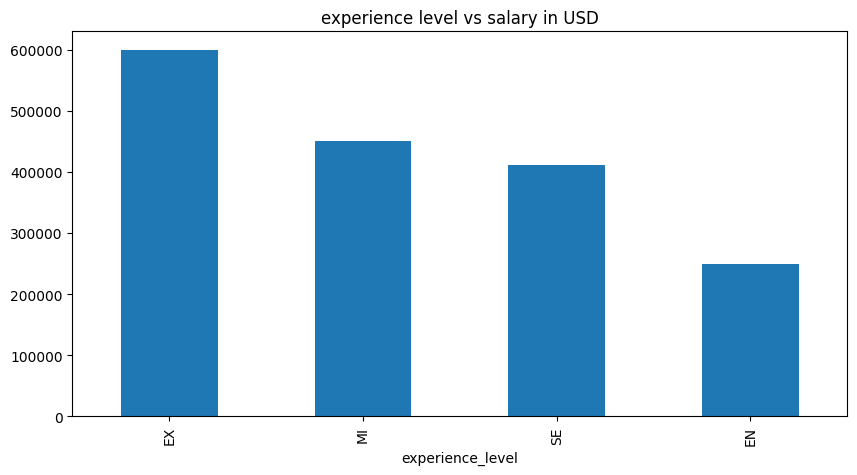

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('experience_level')['salary_in_usd'].max().sort_values(ascending=False).plot.bar()
plt.title('experience level vs salary in USD')

<Axes: ylabel='salary_in_usd'>

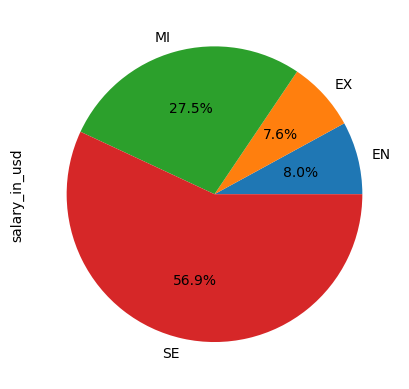

In [ ]:
df.groupby("experience_level")["salary_in_usd"].sum().plot(kind = 'pie' ,autopct='%1.1f%%')

full time employers have highest salary

Text(0.5, 1.0, 'employment type vs salary in USD')

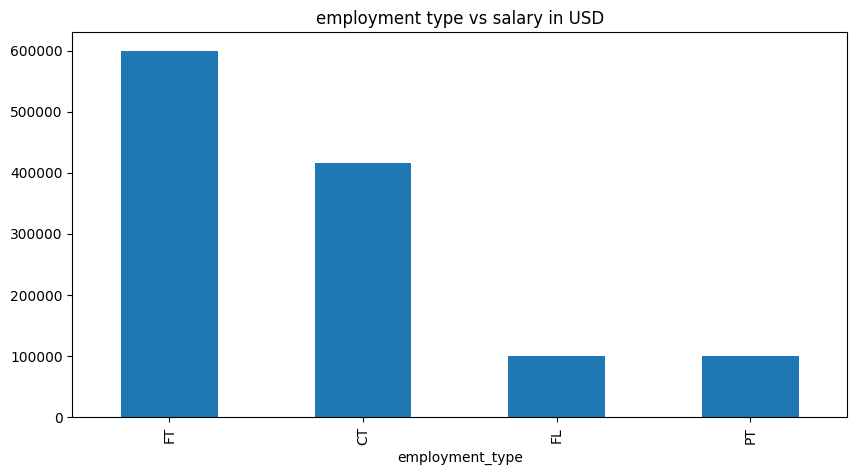

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('employment_type')['salary_in_usd'].max().sort_values(ascending=False).plot.bar()
plt.title('employment type vs salary in USD')

The employee who worked as principal data engineer has the highest salary

Text(0.5, 1.0, 'job type vs salary in USD')

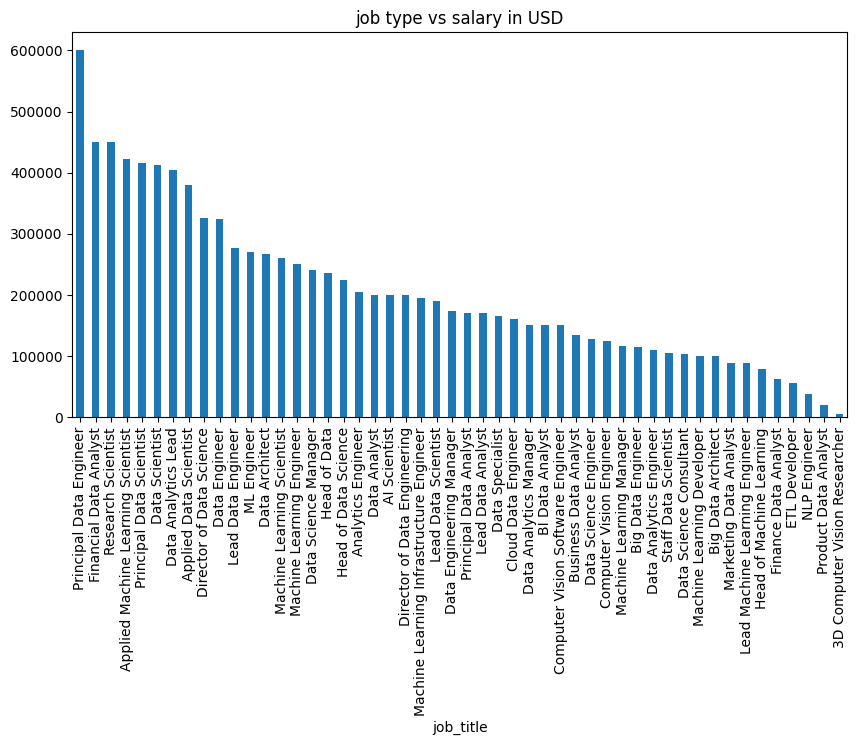

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False).plot.bar()
plt.title('job type vs salary in USD')

the employee who take the hieghst salary works as Principal Data Engineer and his experience level is Executive-level/Director and he works in large company

In [ ]:
df[df['salary_in_usd']==df['salary_in_usd'].max()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L


The employee who takes the minimus salary works as data scientist and his experience level is mid level and he works in a small company.

In [ ]:
df[df['salary_in_usd']==df['salary_in_usd'].min()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S


employes work in US have the highest salary

Text(0.5, 1.0, 'company location vs salary in USD')

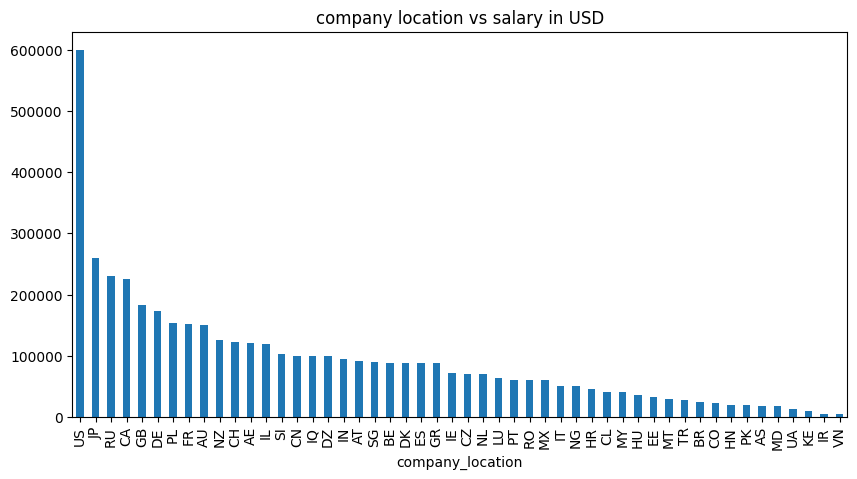

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('company_location')['salary_in_usd'].max().sort_values(ascending=False).plot.bar()
plt.title('company location vs salary in USD')

large campany have high salary

Text(0.5, 1.0, 'company size vs salary in USD')

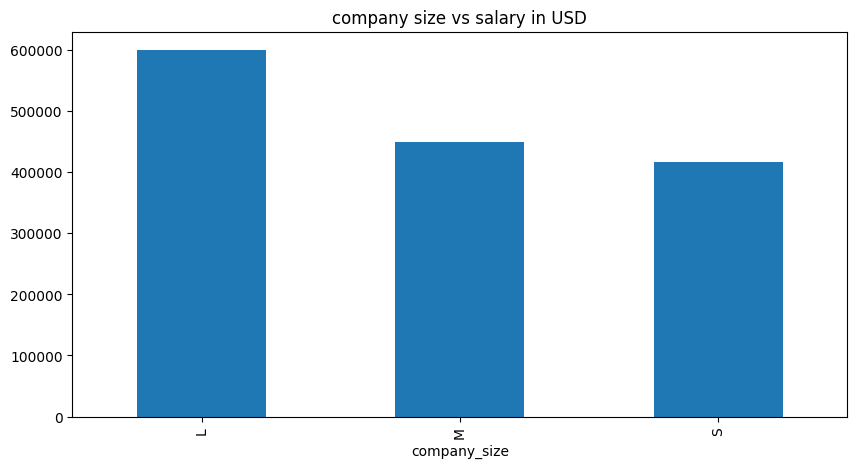

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('company_size')['salary_in_usd'].max().sort_values(ascending=False).plot.bar()
plt.title('company size vs salary in USD')

<Axes: ylabel='salary_in_usd'>

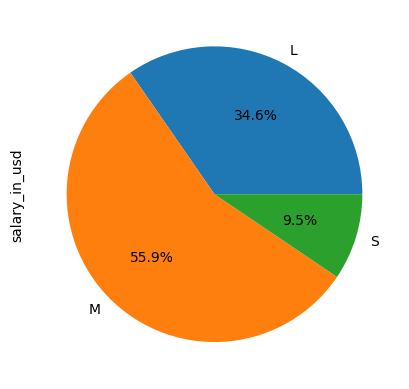

In [ ]:
df.groupby("company_size")["salary_in_usd"].sum().plot(kind = 'pie' ,autopct='%1.1f%%')

In [ ]:
df['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

most of peple are work in medium size company

<Figure size 1000x500 with 0 Axes>

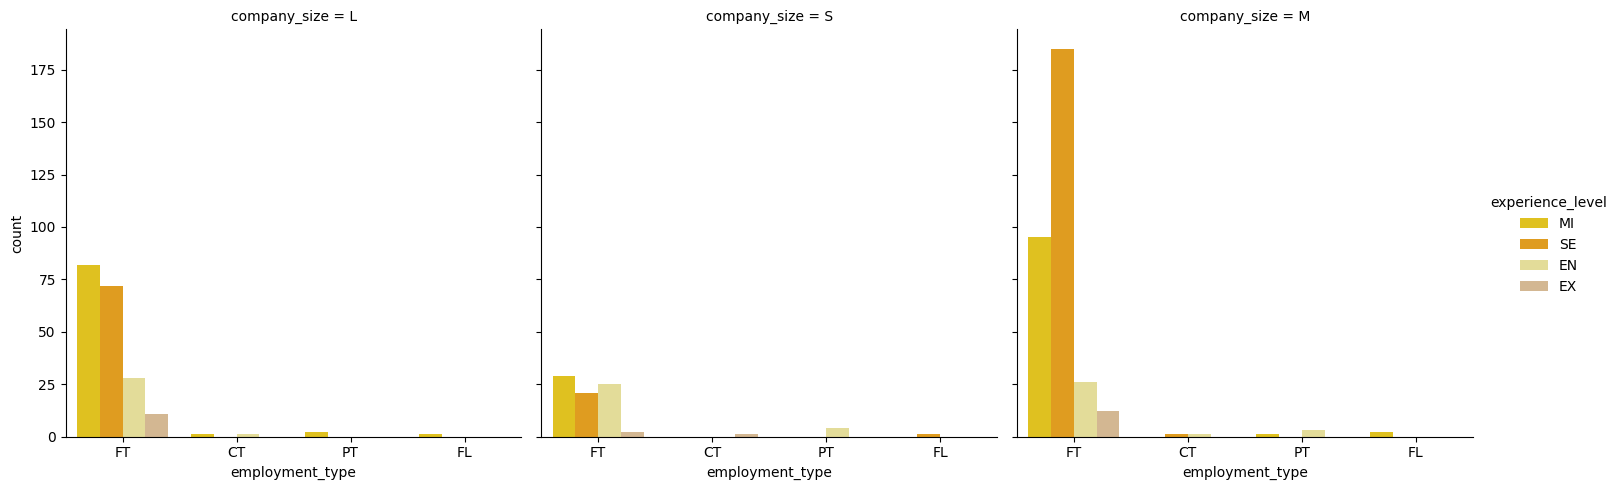

In [ ]:
plt.figure(figsize=(10,5))
color_dict = {'MI':'gold','SE':'orange','EN':'khaki','EX':'burlywood'}
sns.catplot(x='employment_type',data=df,hue='experience_level',col='company_size',kind='count',palette=color_dict)

* In large company most of the workers are mid level and senior level
* In medium company most of workers are senior level
* In small company most of workers are mid level and entry level


<Axes: >

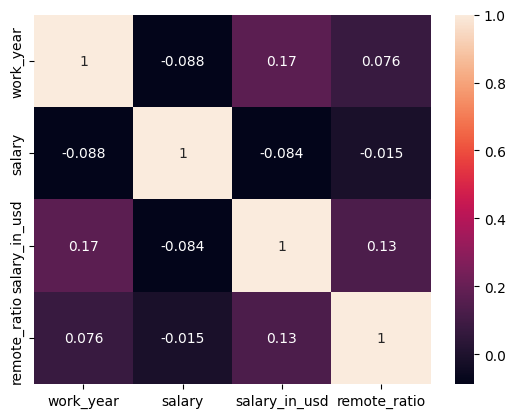

In [ ]:
sns.heatmap(df.corr(),annot=True)

# <h1> <center> **Observations**
1. the highest value for employment type here is full time
2. the highest value of salary currency is USD
3. most of people are Senior-level
4. most of people here are work in medium size company
5. the employee who worked in principle data engineer has the highest salary
6. people who work on 2021 have highest salary
7.the employee who take the highest salary is executive level
8. the employee who worked in us has the highest salary here
9. the employee who works in large company has the highest salary
10. the employee who works as full time has the highest salary
11. in the large company most of workers are intermediate and senior level
12. in medium company the most of workers are senior level
13. in small company most of workers are mid level and entry level


# <h1> <center> **Applying Models** <center>

In [ ]:
# select columns with object data type
column_obj = df.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()
for i in column_obj:
  df[i] = le.fit_transform(df[i])

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,3,2,17,154000,16,154000,55,100,48,1
603,2022,3,2,17,126000,16,126000,55,100,48,1
604,2022,3,2,12,129000,16,129000,55,0,48,1
605,2022,3,2,12,150000,16,150000,55,100,48,1


In [ ]:
df.corr()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,-0.087577,0.202420,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,-0.023811,0.199998,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,0.000536,-0.087365,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.027710,-0.149591,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
salary,-0.087577,-0.023811,0.000536,0.027710,1.000000,-0.120725,-0.083906,-0.105638,-0.014608,-0.082894,-0.079959
salary_currency,0.202420,0.199998,-0.087365,-0.149591,-0.120725,1.000000,0.420550,0.758730,0.149746,0.787084,0.038849
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,-0.083906,0.420550,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,-0.105638,0.758730,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,-0.014608,0.149746,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,-0.082894,0.787084,0.428994,0.897704,0.169083,1.000000,-0.066554


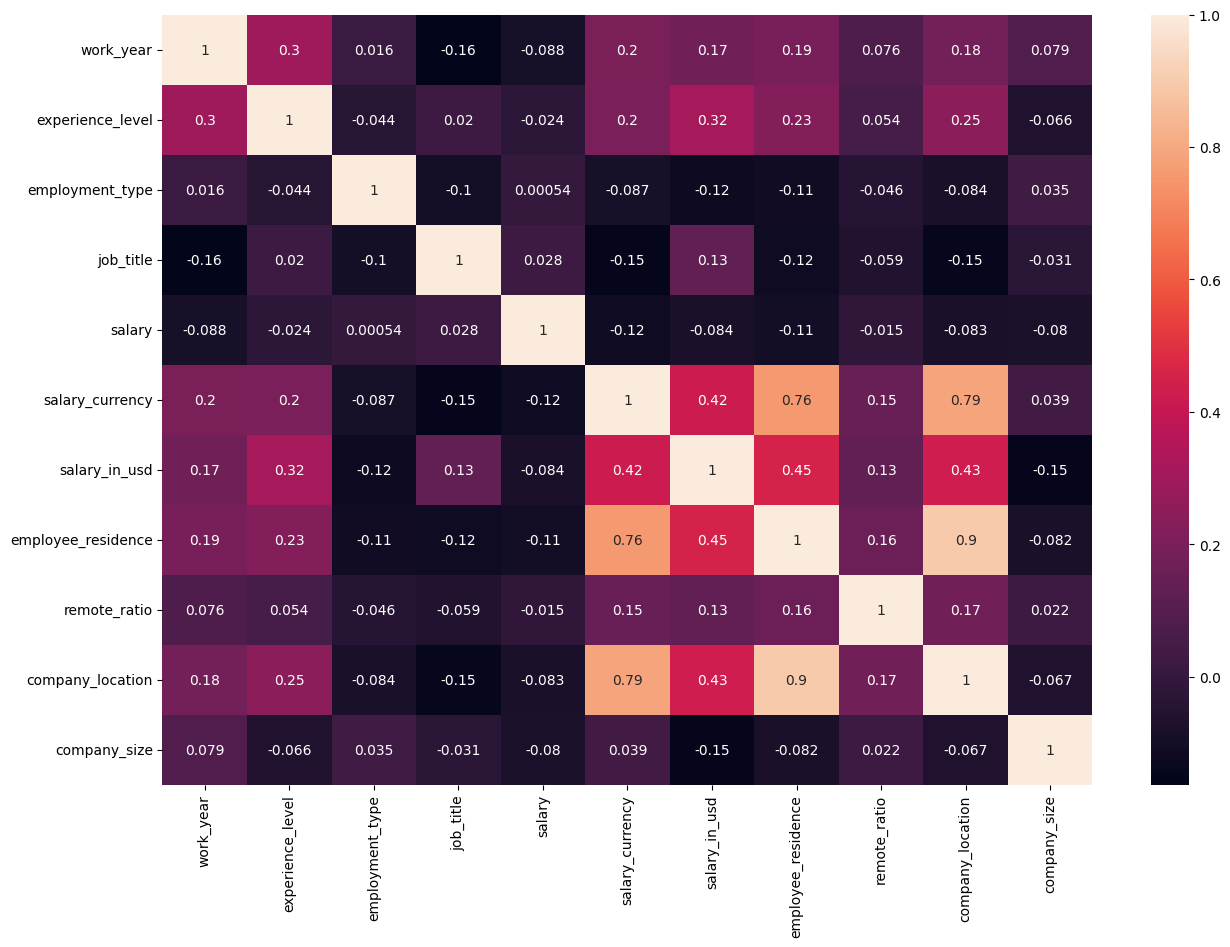

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

train test split

In [ ]:
X=df.drop(['salary_in_usd'],axis=1)
y=df['salary_in_usd']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)


In [ ]:
X_train.shape,y_train.shape

((485, 10), (485,))

In [ ]:
X_test.shape,y_test.shape

((122, 10), (122,))

In [ ]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=40)
xgb = XGBRegressor(random_state=1)

models = [lr,rf,xgb]

for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  submit = pd.DataFrame()
  submit['Actual_salary'] = y_test
  submit['Predict_salary'] = y_pred
  submit = submit.reset_index()


  print("MAE:",mean_absolute_error(y_test,y_pred))
  print("MSE:",mean_squared_error(y_test,y_pred))
  print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("r2_score:",r2_score(y_test,y_pred))
  print(submit.head(5))

LinearRegression()
MAE: 41861.199450740365
MSE: 2916519174.555667
RMSE: 54004.80695785947
r2_score: 0.2776863802864621
   index  Actual_salary  Predict_salary
0     65          62726    13277.700155
1    237          46809    69785.278039
2    147          90000   144343.724303
3    464         162674   116981.873055
4    187          69741    37511.476701
RandomForestRegressor(random_state=40)
MAE: 6125.515409836066
MSE: 260798760.62250826
RMSE: 16149.265018028165
r2_score: 0.9354098205677842
   index  Actual_salary  Predict_salary
0     65          62726        63220.96
1    237          46809        46104.48
2    147          90000        90265.70
3    464         162674       158800.63
4    187          69741        58118.67
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature

RandomForestRegressor is the best model